In [1]:
#!pip install git+https://github.com/microsoft/dowhy.git

In [2]:
import numpy as np
import pandas as pd
import dowhy

/home/ma/ma_ma/ma_mskiera/.local/lib/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [3]:
df = pd.read_csv("bpi2017_enhancedData.csv")

In [9]:
df['treatment'] = df['treatment'].replace({'treated': 1, 'notTreated': 0})

In [13]:
dot_graph = dowhy.digraph {treatment->successful; CreditScore-> treatment; OfferedAmount-> successful; NumberOfTerms-> successful; MonthlyCost-> successful;}

SyntaxError: invalid syntax (2700398966.py, line 1)

In [12]:
gml_graph = dowhy.graph[directed 1node[ id "successful" label "y"]node[ id "CreditScore" label "CS"] node[ id "OfferedAmount" label "OA"] node[ id "NumberOfTerms" label "NT"] node[ id "MonthlyCost" label "MC"] node[ id "treatment" label "T"] edge[source "T" target "y"]edge[ source "CS" target "T"] edge[ source "OA" target "y"] edge[ source "NT" target "y"] edge[ source "MC" target "y"]]

SyntaxError: invalid syntax (3055398010.py, line 1)

In [16]:
model1=dowhy.CausalModel(
        data = df,
        treatment='treatment',
        outcome='successful',
        common_causes=['CreditScore', 'OfferedAmount', 'NumberOfTerms', 'MonthlyCost']
        )

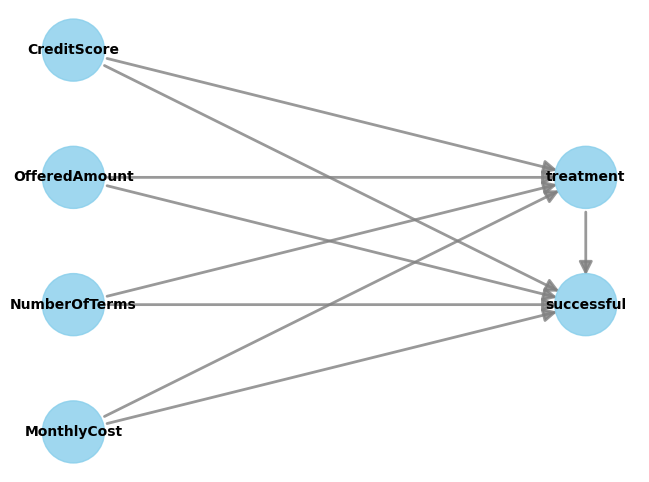

In [18]:
model1.view_model()

In [10]:
# Run a linear regression of column successful on treatment in df
import statsmodels.api as sm

X = df['treatment'].astype(int)
y = df['successful'].astype(int)

X = sm.add_constant(X)

ols = sm.OLS(y, X).fit()

# Display a more parsimonious results summary
print(ols.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6414      0.000   1405.407      0.000       0.640       0.642
treatment      0.0966      0.002     64.092      0.000       0.094       0.100


In [20]:
# Step 2: Identify the causal effect
identified_estimand = model1.identify_effect()

# Step 3: Estimate the causal effect
estimate = model1.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_matching")

# Step 4: Refute the estimate
refute_results = model1.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")

# Step 5: Print results
print(estimate)
print(refute_results)

# Step 6: Plot the causal graph
graph = model1.view_model()
#graph.save_graph("causal_graph.gml")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Check whether causal effect is identified and return target estimands
identified_estimand = model.identify_effect()

In [ ]:
# Estimate the causal effect using inverse probability weighting
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.propensity_score_weighting")

In [ ]:
# Check sensitivity of obtained estimate to unobserved confounders
refute_results = model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause")